# Opentrons Mass Balance Automation 

## Aniket Chitre

### 0. Import Packages

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import serial
import csv

### 1. Port for Mass Balance

Find the port number on Windows through Device Manager or on Mac through running this command (`ls /dev/tty.*`) on the Terminal

In [2]:
#port = '/dev/tty.usbserial-14130'
port = 'COM5'

### 2. Function to Read Mass from Balance

In [3]:
def get_mass(port):
    try:
        balance = serial.Serial(port, 9600, xonxoff=True) # check COM port and xonxoff (handshake) = True default for MT balance
        balance.write('S\r\n'.encode('utf-8'))
        time.sleep(1)
        result  = balance.read_until('\r\n'.encode('utf-8'))
        value = str(result[7:14].decode("utf-8"))
        #balance.close()
        if (value.strip() != '-------') and (value.strip() != ''):
            return (True,float(value))
        return (False,-1)
    except:
        return (False,-1)

### 3. Real-time Data

In [4]:
x = [] #store time here 
mass = [] #store mass here
i = 0

while True:
    x.append(i*2)
    
    status, val = get_mass(port)
    if status == True:
        curr_val = val
    else:
        curr_val = mass[-1]
        
    print(curr_val)
    mass.append(curr_val)
    
    time.sleep(1)
    i += 1

0.001
0.001
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.001
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.001
0.0
0.0
0.0
-0.002
-0.002
-0.002
0.0
-0.002
-0.003
-0.003
-0.003
-0.004
-0.001
-0.003
-0.003
0.995
0.997
0.996
0.996
0.999
1.971
1.971
1.971
1.973
2.976
2.974
2.974
2.973
3.976
3.976
3.975
3.977
4.956
4.958
4.96
4.959
4.96
5.965
5.964
5.963
5.964
6.706
6.706
6.706
6.706
7.429
7.429
7.429
7.429
8.411
8.408
8.408
8.407
9.382
9.384
9.386
9.386
9.386
10.384
10.388
10.389
10.388
10.388
11.386
11.39
11.392
11.389
11.389
12.365
12.368
12.37
12.367
12.367
13.341
13.344
13.346
13.345
13.346
14.04
14.042
14.044
14.042
14.043
14.043
14.746
14.745
14.744
15.72
15.72
15.719
15.721
16.722
16.722
16.72
16.72
17.725
17.725
17.724
17.724
18.727
18.726
18.726
18.726
19.726
19.725
19.725
19.726
20.725
20.725
20.725
20.725
21.517
21.516
21.515
21.515
21.515
22.309
22.308
22.308
23.313
23.312
23.311
23.311
24.314
24.312
24.311
24.311
25.317
25.317
25.316
25.316
26.294
26.294
26.293
26.293
2

58.427
58.427
58.426
58.426
58.426
58.424
58.424
58.424
58.424
58.423
58.507
58.538
58.566
58.566
58.59
58.594
58.587
58.587
58.587
58.587
58.585
58.585
58.586
58.586
58.586
58.586
58.585
58.585
58.585
58.591
58.591
58.589
58.589
58.586
58.586
58.585
58.585
58.585
58.585
58.585
58.585
58.585
58.585
58.584
58.584
58.583
58.583
58.583
58.583
58.583
58.581
58.581
58.583
58.583
58.582
58.582
58.582
58.582
58.582
58.58
58.579
58.579
58.579
58.579
58.627
58.655
58.687
58.715
58.715
58.715
58.715
58.713
58.713
58.713
58.712
58.712
58.711
58.711
58.724
58.725
58.725
58.724
58.723
58.721
58.724
58.725
58.724
58.724
58.724
58.724
58.723
58.722
58.722
58.722
58.722
58.722
58.721
58.721
58.72
58.72
58.72
58.72
58.72
58.72
58.72
58.72
58.721
58.719
58.719
58.719
58.719
58.719
58.719
58.719
58.719
58.719
58.719
58.719
58.715
58.715
58.715
58.716
58.716
58.745
58.777
58.834
58.863
58.894
58.925
58.956
58.99
58.988
58.988
58.988
58.988
58.998
58.998
58.998
58.997
58.997
58.997
58.996
58.996
58.996
58.


KeyboardInterrupt



In [5]:
results = {'Time': x, 'Mass': mass}

### 4. Plotting and Exporting Data

In [6]:
mass_df = pd.DataFrame(results)
mass_df

,Time,Mass
0,0,0.001
1,2,0.001
2,4,0.000
3,6,0.000
4,8,0.000
...,...,...
1717,3434,60.569
1718,3436,60.569
1719,3438,60.569
1720,3440,60.569


<IPython.core.display.Javascript object>


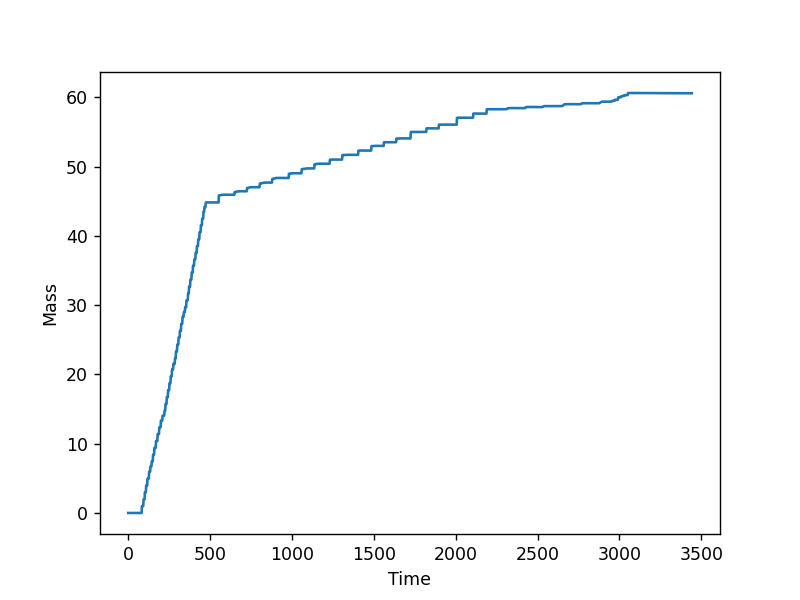

In [7]:
sns.lineplot(x='Time', y='Mass', data=mass_df);

In [8]:
mass_df.to_csv('mass_data/MassProfile_100323_S151-156.csv')